Import required classes

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

Read Salary dataset

In [5]:
dataset = pd.read_csv("../../Dataset/Salary_dataset.csv")
dataset=dataset[['YearsExperience','Salary']]
dataset

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Analyze Dataset

In [9]:
dataset.shape

(30, 2)

In [11]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [13]:
x_points=np.array(dataset[['YearsExperience']])
y_points=np.array(dataset[['Salary']])

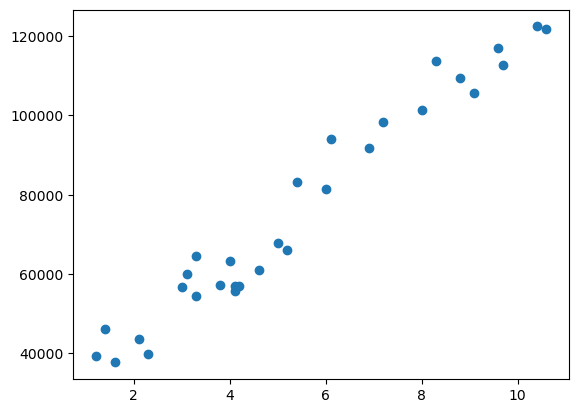

In [15]:
plt.plot(x_points,y_points,'o')
plt.show()

Split dependent and independent variables

In [18]:
independent = dataset[['YearsExperience']]
dependent = dataset[['Salary']]

Split train and test data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [23]:
x_train,y_train,x_test,y_test

(    YearsExperience
 22              8.0
 5               3.0
 16              5.2
 8               3.3
 14              4.6
 23              8.3
 20              6.9
 1               1.4
 29             10.6
 6               3.1
 4               2.3
 18              6.0
 19              6.1
 9               3.8
 7               3.3
 25              9.1
 3               2.1
 0               1.2
 21              7.2
 15              5.0
 12              4.1,
       Salary
 22  101303.0
 5    56643.0
 16   66030.0
 8    64446.0
 14   61112.0
 23  113813.0
 20   91739.0
 1    46206.0
 29  121873.0
 6    60151.0
 4    39892.0
 18   81364.0
 19   93941.0
 9    57190.0
 7    54446.0
 25  105583.0
 3    43526.0
 0    39344.0
 21   98274.0
 15   67939.0
 12   56958.0,
     YearsExperience
 2               1.6
 28             10.4
 13              4.2
 10              4.0
 26              9.6
 24              8.8
 27              9.7
 11              4.1
 17              5.4,
       Salary
 2 

Train dataset using Simple linear regression model

In [26]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
weight = regressor.coef_
weight

array([[9360.26128619]])

In [34]:
bias = regressor.intercept_
bias

array([25842.36521258])

Predict results for test data

In [42]:
y_pred = regressor.predict(x_test)
y_pred

array([[ 40818.78327049],
       [123189.08258899],
       [ 65155.46261459],
       [ 63283.41035735],
       [115700.87356004],
       [108212.66453108],
       [116636.89968866],
       [ 64219.43648597],
       [ 76387.77615802]])

Model Evaluation

In [51]:
r_score=r2_score(y_pred,y_test)
r_score

0.9710122289422968

Save finalized model

In [58]:
salary_predition_model = pickle.dump(regressor,open("../../Models/SalaryPrediction_SLR.sav",'wb'))

In [72]:
predict_model = pickle.load(open("../../Models/SalaryPrediction_SLR.sav",'rb'))
y_pred = predict_model.predict([[12]])
y_pred

C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[138165.5006469]])